In [349]:
from urllib.request import urlopen
import numpy as np
linkin = "http://www.amlbook.com/data/zip/features.train"

linkout="http://www.amlbook.com/data/zip/features.test"


def getline(line):
    q=line.rstrip()
    q=q.decode()
    q=q.split()
    qq=[float(i) for i in q]
    return(qq)
stop=0
lpts=[]
lrealdigs=[]
vouts=[]
vpts=[]
inerrs=[]
valerrs=[]
 
f = urlopen(linkin)
stop=0
tpts=[]
trealdigs=[]
terrs=[]
while not(stop):
    myline = f.readline()
    if len(myline)<1:
        stop=1
    else:
        a=getline(myline)
        lpts.append([a[1],a[2]])
        lrealdigs.append(a[0])
# OUT data:
f = urlopen(linkout)

stop=0
tpts=[]
touts=[]
terrs=[]
while not(stop):
    myline = f.readline()
    if len(myline)<1:
        stop=1
    else:
        a=getline(myline)
        tpts.append([a[1],a[2]])
        trealdigs.append(a[0])


In [353]:
len(lrealdigs)

7291

In [1]:
# THIS TIME WITH REALLY SOLVING FOR THE SUPPORT VECTORS!
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import cvxopt
from cvxopt import matrix
from cvxopt import solvers
# def targetf(y):
#         if y==dig:
#             return 1
#         else: 
#             return -1
dig=2
trainerrs=[]
testerrs=[]
louts=np.ones(len(lrealdigs))
inds=np.argwhere(np.array(lrealdigs)!=dig)
louts[inds]*=-1
touts=np.ones(len(trealdigs))
inds=np.argwhere(np.array(trealdigs)!=dig)
touts[inds]*=-1

toplot=0
Nvecs=[]
pla_b=[]
svm_b=[]
Q=2
C=0.01
mat=np.eye(len(lpts))
for i in range(len(lpts)):
    for j in range(len(lpts)):
        mat[i][j]=louts[i]*louts[j]*(1+np.dot(lpts[i],lpts[j]))**Q
            
            
P=matrix(mat)

q=matrix(np.ones(len(louts))*-1,tc='d')
A=matrix(np.matrix(louts),tc='d')
# A=np.transpose(A)
bb=matrix(0,tc='d')
G=matrix(np.eye(len(lpts)),tc='d')

h=matrix(np.ones(len(louts))*C)
sol = solvers.qp(P,q,G,h,A,bb)
# solution=cvxopt_solve_qp(P, q,G,h,A,b)
a=sol['x']
alphas=np.array(a)


svs=[]
svinds=[]
WSVM=[0,0]
for i in range(len(alphas)):
    if alphas[i]>C*0.8:
        svs.append(lpts[i])
        WSVM=np.add(WSVM,np.multiply(lpts[i],louts[i])*alphas[i])
        svinds.append(i)

theb=(louts[svinds[0]]*np.dot(WSVM,lpts[svinds[0]])-1)/-louts[svinds[0]]
svs

def calcerr(ppts,ppouts):
    y12=[np.sign(np.dot(WSVM,pt)+theb) for pt in ppts]
    SV_badscnt=sum(np.array(ppouts)!=np.array(y12))
    return SV_badscnt/len(ppts)
trainerrs.append(calcerr(lpts,louts))
testerrs.append(calcerr(tpts,touts))

NameError: name 'lrealdigs' is not defined

In [13]:
trainerrs=[]
testerrs=[]

trainerrs.append(calcerr(lpts,louts))
testerrs.append(calcerr(tpts,touts))


In [18]:
testerrs

[0.11509715994020926]

In [4]:
import quadprog
quadprog.solve_qp(qp_G, qp_a, qp_C, qp_b, meq)[0]

NameError: name 'qp_G' is not defined

(array([ 6560.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   731.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

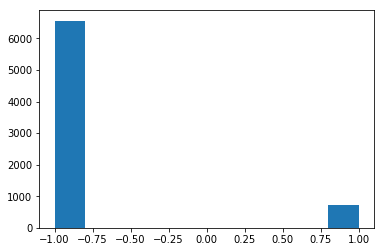

In [48]:
plt.hist(louts)

In [18]:
from sklearn import svm
trainerrs=[]
testerrs=[]
Nvecs=[]
for dig in range(10):
    
    louts=np.ones(len(lrealdigs))
    inds=np.argwhere(np.array(lrealdigs)!=dig)
    louts[inds]*=-1
    touts=np.ones(len(trealdigs))
    inds=np.argwhere(np.array(trealdigs)!=dig)
    touts[inds]*=-1
    
    svc = svm.SVC(kernel='poly',degree=2,C=10**-2)
    svc.fit(lpts, louts) 
    Nvecs.append(len(svc.support_vectors_))
    yp=svc.predict(lpts)
    badscntl=louts!=yp
    print(sum(badscntl)/len(louts))
    trainerrs.append(sum(badscntl)/len(louts))
    yp=svc.predict(tpts)
    badscntt=touts!=yp
    print(sum(badscntt)/len(touts))
    testerrs.append(sum(badscntt)/len(touts))

0.163763544095
0.176880916791
0.0157728706625
0.023418036871
0.100260595254
0.0986547085202
0.0902482512687
0.0827105132038
0.0894253188863
0.0996512207275
0.0762584007681
0.079720976582
0.0910711836511
0.0847035376183
0.0884652311068
0.0732436472347
0.0743382252092
0.0827105132038
0.0883280757098
0.0881913303438


In [20]:
trainerrs

[0.16376354409546015,
 0.015772870662460567,
 0.10026059525442327,
 0.090248251268687421,
 0.089425318886298177,
 0.076258400768070222,
 0.091071183651076665,
 0.088465231106844053,
 0.074338225209161987,
 0.088328075709779186]

In [340]:
from sklearn import svm
trainerrs=[]
testerrs=[]
Nvecs=[]


louts=np.ones(len(lrealdigs))*0

inds1=np.argwhere(np.array(lrealdigs)==1)
louts[inds1]+=1
inds2=np.argwhere(np.array(lrealdigs)==5)
louts[inds2]+=-1
lnewpts=[lpts[i] for i in range(len(lpts)) if (i in inds1) or (i in inds2) ]
lnewouts=[louts[i] for i in range(len(lpts)) if (i in inds1) or (i in inds2)]

touts=np.ones(len(trealdigs))*0
inds1=np.argwhere(np.array(trealdigs)==1)
touts[inds1]+=1
inds2=np.argwhere(np.array(trealdigs)==5)
touts[inds2]+=-1
tnewpts=[tpts[i] for i in range(len(tpts)) if (i in inds1) or (i in inds2) ]
tnewouts=[touts[i] for i in range(len(tpts)) if (i in inds1) or (i in inds2)]
# newpts=lpts[inds1]
for Q in [2,5]:
    for CC in [0.0001,0.001,0.01,0.1,1]:
    # touts=np.ones(len(trealdigs))
    # inds=np.argwhere(np.array(trealdigs)!=dig)
    # touts[inds]*=-1
        print(CC)
        svc = svm.SVC(kernel='poly',degree=Q,C=CC)
        svc.fit(lnewpts, lnewouts) 
        Nvecs.append(len(svc.support_vectors_))
        yp=svc.predict(lnewpts)
        badscntl=lnewouts!=yp
        # print(sum(badscntl)/len(louts))
        trainerrs.append(sum(badscntl)/len(lnewouts))
        yp=svc.predict(tnewpts)
        badscntt=tnewouts!=yp
    #     print(sum(badscntt)/len(tnewouts))
        testerrs.append(sum(badscntt)/len(tnewouts))

0.0001
0.001
0.01
0.1
1
0.0001
0.001
0.01
0.1
1


In [354]:
louts=np.ones(len(lrealdigs))*0

inds1=np.argwhere(np.array(lrealdigs)==1)
louts[inds1]+=1
inds2=np.argwhere(np.array(lrealdigs)==5)
louts[inds2]+=-1
lnewpts=[lpts[i] for i in range(len(lpts)) if (i in inds1) or (i in inds2) ]
lnewouts=[louts[i] for i in range(len(lpts)) if (i in inds1) or (i in inds2)]


# inds1=np.argwhere(np.array(lrealdigs)==1)
# inds2=np.argwhere(np.array(lrealdigs)==2)
newpts=[lpts[i] for i in range(len(lpts)) if (i in inds1) or (i in inds2) ]
newouts=np.array([louts[i] for i in range(len(lpts)) if (i in inds1) or (i in inds2)])


In [359]:
np.reshape(testerrs,[2,5])
len(newpts)

1561

In [380]:
newpts1=np.array(newpts)
allmeanverrs=[]
for i in range(100):
    inds= np.random.permutation(range(len(newpts)))
    k=int(np.floor(len(inds)/10))
    cvpts=[]#np.ndarray((10,k))
    masker=[]
    masker=np.zeros(len(newpts))
    

    for i in range(10):
        idds=inds[k*i:k*(i+1)]
        meantime=[newpts[ii] for ii in idds]
        cvpts.append(meantime)
        masker[idds]=i
    meanverrs=[]
    for CC in [0.0001,0.001,0.01,0.1,1]:
        linerrs=[]
        vinerrs=[]
        for i in range(10):
            indsofv=masker==i
            indsofl=masker!=i
            lpts=newpts1[indsofl]
            vpts=newpts1[indsofv]
            louts=newouts[indsofl]
            vouts=newouts[indsofv]
            svc = svm.SVC(kernel='poly',degree=Q,C=CC)
            svc.fit(lpts, louts) 
            yp=svc.predict(lpts)
            linerrs.append(sum(louts!=yp)/len(louts))
            yp=svc.predict(vpts)
            vinerrs.append(sum(vouts!=yp)/len(vouts))
        meanverrs.append(np.average(vinerrs))
    allmeanverrs.append(meanverrs)
# newpts2=

# Q=2
# for CC in [0.0001,0.001,0.01,0.1,1]:
# # touts=np.ones(len(trealdigs))
# # inds=np.argwhere(np.array(trealdigs)!=dig)
# # touts[inds]*=-1
#     print(CC)
#     svc = svm.SVC(kernel='poly',degree=Q,C=CC)
#     svc.fit(lnewpts, lnewouts) 
#     Nvecs.append(len(svc.support_vectors_))
#     yp=svc.predict(lnewpts)
#     badscntl=lnewouts!=yp
#     # print(sum(badscntl)/len(louts))
#     trainerrs.append(sum(badscntl)/len(lnewouts))
#     yp=svc.predict(tnewpts)
#     badscntt=tnewouts!=yp
# #     print(sum(badscntt)/len(tnewouts))
#     testerrs.append(sum(badscntt)/len(tnewouts))

In [391]:
for i in range(100):
    www=np.where(allmeanverrs[i]==min(allmeanverrs[i]))
#     print(www)

In [386]:
c01=[i[1] for i in allmeanverrs]

In [407]:
inds= np.random.permutation(range(len(newpts)))
k=int(np.floor(len(inds)/10))
cvpts=[]#np.ndarray((10,k))
masker=[]
masker=np.zeros(len(newpts))
lerrs=[]
terrs=[]
for i in range(10):
    idds=inds[k*i:k*(i+1)]
    meantime=[newpts[ii] for ii in idds]
    cvpts.append(meantime)
    masker[idds]=i
meanverrs=[]
for CC in [0.01,1,100,10**4,10**6]:
    lpts=newpts1
    louts=newouts
    svc = svm.SVC(kernel='rbf',gamma=1,C=CC)
    svc.fit(lpts, louts) 
    yp=svc.predict(lpts)
    err=(sum(louts!=yp)/len(louts))
    lerrs.append(err)
    yp=svc.predict(tnewpts)
    err=(sum(tnewouts!=yp)/len(tnewouts))
    terrs.append(err)
#     linerrs=[]
#     vinerrs=[]
#     for i in range(10):
#         indsofv=masker==i
#         indsofl=masker!=i
#         lpts=newpts1[indsofl]
#         vpts=newpts1[indsofv]
#         louts=newouts[indsofl]
#         vouts=newouts[indsofv]
#         svc = svm.SVC(kernel='poly',degree=Q,C=CC)
#         svc.fit(lpts, louts) 
#         yp=svc.predict(lpts)
#         linerrs.append(sum(louts!=yp)/len(louts))
#         yp=svc.predict(vpts)
#         vinerrs.append(sum(vouts!=yp)/len(vouts))
    meanverrs.append(np.average(vinerrs))
allmeanverrs.append(meanverrs)

In [400]:
lpts=newpts1
louts=newouts
svc = svm.SVC(kernel='rbf',gamma=1,C=CC)
svc.fit(lpts, louts) 
yp=svc.predict(lpts)
err=(sum(louts!=yp)/len(louts))

In [406]:
len(tnewpts)
len(tnewouts)

424

In [408]:
terrs

[0.02358490566037736,
 0.021226415094339621,
 0.018867924528301886,
 0.02358490566037736,
 0.02358490566037736]